# Tugas Besar IF2220 Probabilitas dan Statistika: Penarikan Kesimpulan dan Pengujian Hipotesis

## Nomor 5

Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

 1. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
 2. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
 3. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
 4. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?
 5. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

### Persiapan Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, f

In [2]:
# Membaca data dan melihat beberapa data pertama
df = pd.read_csv('water_potability.csv', index_col=0)
df.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
id,,,,,,,,,,
1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [3]:
def split_data_equal(df):
    half_data_len = df.count() // 2
    return df[:half_data_len], df[half_data_len:]

### Bagian 1

Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

In [4]:
# Mempersiapkan Data
p1_df_upper, p1_df_lower = split_data_equal(df['Sulfate'])

p1_alpha = 0.05

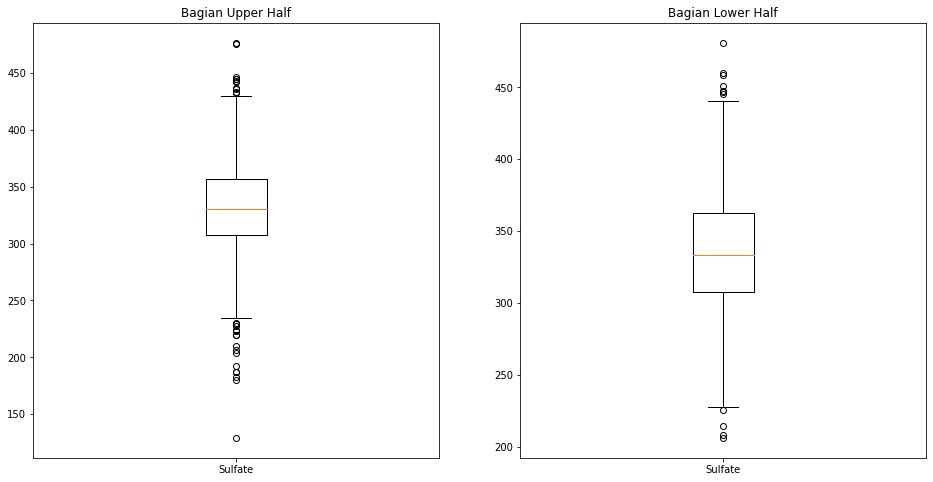

In [5]:
# Gambar Boxplot Data
fig, (ax_upper, ax_lower) = plt.subplots(1, 2, figsize=(16, 8))
ax_upper.set_title("Bagian Upper Half")
ax_lower.set_title("Bagian Lower Half")
_ = ax_upper.boxplot(p1_df_upper, labels=['Sulfate'])
_ = ax_lower.boxplot(p1_df_lower, labels=['Sulfate'])

#### Penentuan Hipotesis

Pada pengujian ini, `H0` adalah `miu_1 == miu_2` dan `H1` adalah `miu_1 != miu_2` *(Two-tailed test)*.

#### Nilai `alpha`

Nilai `alpha` yang digunakan adalah 0.05

#### Daerah Kritis

In [6]:
# z < -z_{alpha/2} || z > z_{alpha/2}
print(f"Z < {norm.ppf(p1_alpha / 2)} or Z > {norm.ppf(1 - p1_alpha/2)}")

Z < -1.9599639845400545 or Z > 1.959963984540054


#### Tes Statistik

Pengujian menggunakan test statistik untuk menentukan bahwa selisih dari kedua rata-rata data bernilai 0 dan kedua variansi diketahui

In [7]:
# Detail Data
p1_miu_1 = p1_df_upper.mean()
p1_miu_2 = p1_df_lower.mean()
p1_var_1 = p1_df_upper.var()
p1_var_2 = p1_df_lower.var()
p1_cnt_1 = p1_df_upper.count()
p1_cnt_2 = p1_df_lower.count()


p1_details = [
    f"miu_1 = {p1_miu_1}",
    f"miu_2 = {p1_miu_2}",
    f"var_1 = {p1_var_1}",
    f"var_2 = {p1_var_2}",
    f"cnt_1 = {p1_cnt_1}",
    f"cnt_2 = {p1_cnt_2}",
]

print("Detail Data")
for p1_s in p1_details:
    print(p1_s)
    
print("Uji Statistik")
p1_z = (p1_miu_1 - p1_miu_2 - 0) / ((p1_var_1 / p1_cnt_1) + (p1_var_2 / p1_cnt_2)) ** 0.5
print(f"Z = {p1_z}")

Detail Data
miu_1 = 331.30532950549565
miu_2 = 335.11742332488245
var_1 = 1708.3966020772502
var_2 = 1682.7330644425087
cnt_1 = 1005
cnt_2 = 1005
Uji Statistik
Z = -2.0752690696871983


#### Kesimpulan

Karena `Z < -Z_{alpha / 2}`, maka `H0` ditolak dan `H1` diterima sehingga rata-rata data awal dan akhir **berbeda**.

### Bagian 2

Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

In [8]:
# Mempersiapkan data
p2_df_upper, p2_df_lower = split_data_equal(df['OrganicCarbon'])
p2_alpha = 0.05

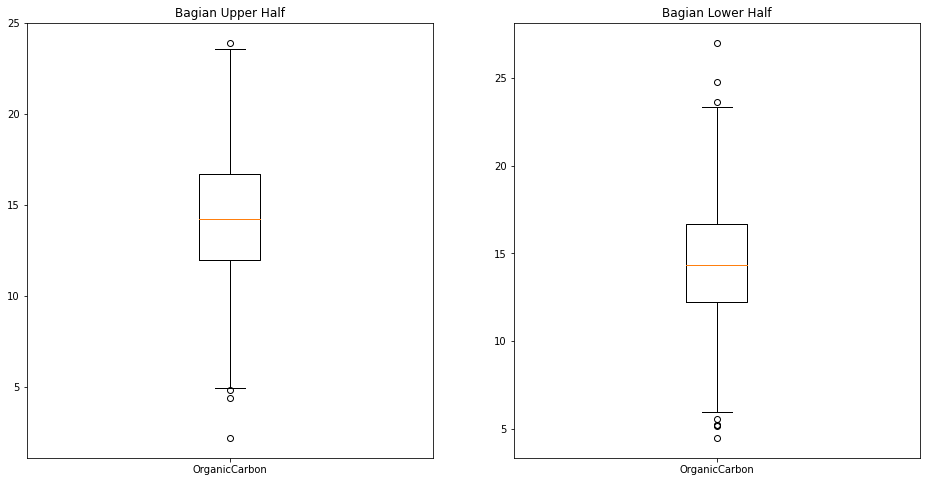

In [9]:
# Gambar Boxplot Data
fig, (ax_upper, ax_lower) = plt.subplots(1, 2, figsize=(16, 8))
ax_upper.set_title("Bagian Upper Half")
ax_lower.set_title("Bagian Lower Half")
_ = ax_upper.boxplot(p2_df_upper, labels=['OrganicCarbon'])
_ = ax_lower.boxplot(p2_df_lower, labels=['OrganicCarbon'])

#### Penentuan Hipotesis

Pada uji ini, `H0` adalah `miu_1 - miu_2 == 0.15` dan `H1` adalah `miu_1 - miu_2 != 0.15` *(Two-tailed test)*.

#### Nilai `alpha`

Nilai `alpha` yang digunakan adalah 0.05

#### Daerah Kritis

In [10]:
# z < -z_{alpha/2} || z > z_{alpha/2}
print(f"Z < {norm.ppf(p2_alpha / 2)} or Z > {norm.ppf(1 - p2_alpha/2)}")

Z < -1.9599639845400545 or Z > 1.959963984540054


#### Tes Statistik

Pengujian menggunakan test statistik untuk menentukan bahwa rata-rata pertama data bernilai 0.15 lebih besar dari rata-rata data kedua dan kedua variansi diketahui

In [11]:
# Detail Data
p2_miu_1 = p2_df_upper.mean()
p2_miu_2 = p2_df_lower.mean()
p2_var_1 = p2_df_upper.var()
p2_var_2 = p2_df_lower.var()
p2_cnt_1 = p2_df_upper.count()
p2_cnt_2 = p2_df_lower.count()


p2_details = [
    f"miu_1 = {p2_miu_1}",
    f"miu_2 = {p2_miu_2}",
    f"var_1 = {p2_var_1}",
    f"var_2 = {p2_var_2}",
    f"cnt_1 = {p2_cnt_1}",
    f"cnt_2 = {p2_cnt_2}",
]

print("Detail Data")
for p2_s in p2_details:
    print(p2_s)
    
print("Uji Statistik")
p2_z = (p2_miu_1 - p2_miu_2 - 0.15) / ((p2_var_1 / p2_cnt_1) + (p2_var_2 / p2_cnt_2)) ** 0.5
print(f"Z = {p2_z}")

Detail Data
miu_1 = 14.253972723723393
miu_2 = 14.461907080372756
var_1 = 11.230287224380323
var_2 = 10.880581782847479
cnt_1 = 1005
cnt_2 = 1005
Uji Statistik
Z = -2.413145517798807


#### Kesimpulan

Karena `Z < -Z_{alpha / 2}`, maka `H0` ditolak dan `H1` diterima sehingga rata-rata data pertama **tidak** lebih besar sebanyak 0.15 dari data kedua.

### Bagian 3

Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

In [12]:
# Mempersiapkan data
p3_df_upper = df['Chloramines'][:100]
p3_df_lower = df['Chloramines'][-100:]
p3_alpha = 0.05

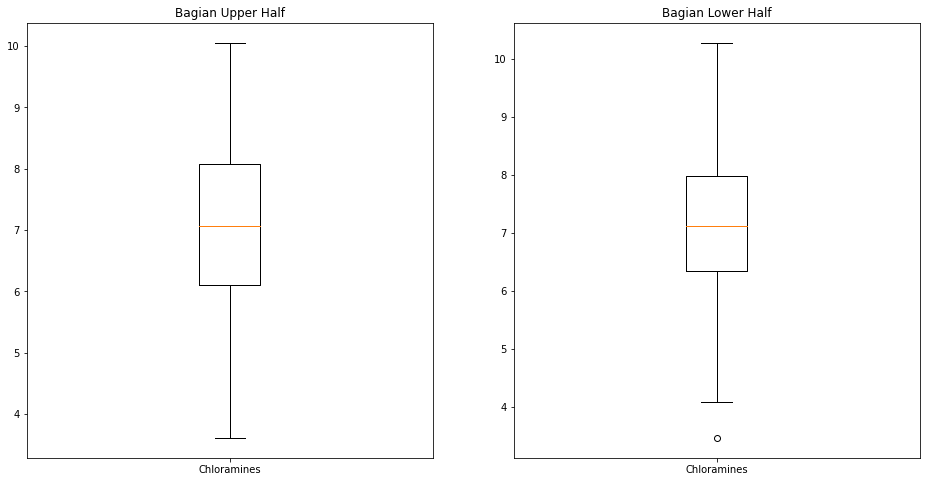

In [13]:
# Gambar Boxplot Data
fig, (ax_upper, ax_lower) = plt.subplots(1, 2, figsize=(16, 8))
ax_upper.set_title("Bagian Upper Half")
ax_lower.set_title("Bagian Lower Half")
_ = ax_upper.boxplot(p3_df_upper, labels=['Chloramines'])
_ = ax_lower.boxplot(p3_df_lower, labels=['Chloramines'])

#### Penentuan Hipotesis

Pada uji ini, `H0` adalah `miu_1 - miu_2 == 0` dan `H1` adalah `miu_1 - miu_2 != 0` *(Two-tailed test)*.

#### Nilai `alpha`

Nilai `alpha` yang digunakan adalah 0.05

#### Daerah Kritis

In [14]:
# z < -z_{alpha/2} || z > z_{alpha/2}
print(f"Z < {norm.ppf(p3_alpha / 2)} or Z > {norm.ppf(1 - p3_alpha/2)}")

Z < -1.9599639845400545 or Z > 1.959963984540054


#### Tes Statistik

Pengujian menggunakan test statistik untuk menentukan bahwa rata-rata pertama data bernilai sama dengan rata-rata data kedua dan kedua variansi diketahui.

In [15]:
# Detail Data
p3_miu_1 = p3_df_upper.mean()
p3_miu_2 = p3_df_lower.mean()
p3_var_1 = p3_df_upper.var()
p3_var_2 = p3_df_lower.var()
p3_cnt_1 = p3_df_upper.count()
p3_cnt_2 = p3_df_lower.count()


p3_details = [
    f"miu_1 = {p3_miu_1}",
    f"miu_2 = {p3_miu_2}",
    f"var_1 = {p3_var_1}",
    f"var_2 = {p3_var_2}",
    f"cnt_1 = {p3_cnt_1}",
    f"cnt_2 = {p3_cnt_2}",
]

print("Detail Data")
for p3_s in p3_details:
    print(p3_s)
    
print("Uji Statistik")
p3_z = (p3_miu_1 - p3_miu_2 - 0) / ((p3_var_1 / p3_cnt_1) + (p3_var_2 / p3_cnt_2)) ** 0.5
print(f"Z = {p3_z}")

Detail Data
miu_1 = 7.007771140423921
miu_2 = 7.147197636249925
var_1 = 2.193041986248721
var_2 = 1.7077427735538262
cnt_1 = 100
cnt_2 = 100
Uji Statistik
Z = -0.7059424842236872


#### Kesimpulan

Karena `-Z_{alpha/2} < Z < Z_{alpha / 2}`, maka Hipotesis `H0` "rata-rata data pertama sama dengan data kedua" diterima.

### Bagian 4

Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

##### Interpretasi Soal

Bagi nilai Turbidity menjadi dua, apakah proporsi nilai diatas 4 di bagian awal sama dengan proporsi nilai diatas 4 di bagian akhir?

In [16]:
# Bagi ke dua yang sama besar
p4_df_upper, p4_df_lower = split_data_equal(df['Turbidity'])
p4_alpha = 0.05

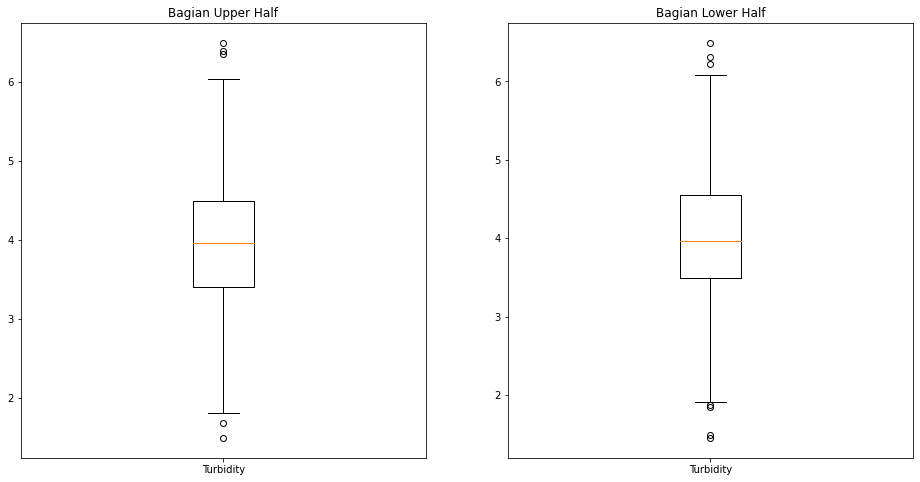

In [17]:
# Gambar Boxplot Data
fig, (ax_upper, ax_lower) = plt.subplots(1, 2, figsize=(16, 8))
ax_upper.set_title("Bagian Upper Half")
ax_lower.set_title("Bagian Lower Half")
_ = ax_upper.boxplot(p4_df_upper, labels=['Turbidity'])
_ = ax_lower.boxplot(p4_df_lower, labels=['Turbidity'])

#### Penentuan Hipotesis

Pada uji ini, `H0` adalah `p_1 == p_2` dan `H1` adalah `p_1 != p_2` *(Two-tailed test)*.

#### Nilai `alpha`

Nilai `alpha` yang digunakan adalah 0.05

#### Daerah Kritis

In [18]:
# z < -z_{alpha/2} || z > z_{alpha/2}
print(f"Z < {norm.ppf(p4_alpha / 2)} or Z > {norm.ppf(1 - p4_alpha/2)}")

Z < -1.9599639845400545 or Z > 1.959963984540054


#### Tes Statistik

Pengujian menggunakan test statistik untuk menentukan bahwa proporsi data awal bernilai sama dengan proporsi data kedua.

In [19]:
# Detail Data
p4_x_1 = p4_df_upper[p4_df_upper > 4].count()
p4_x_2 = p4_df_lower[p4_df_lower > 4].count()
p4_var_1 = p4_df_upper.var()
p4_var_2 = p4_df_lower.var()
p4_n_1 = p4_df_upper.count()
p4_n_2 = p4_df_lower.count()


p4_details = [
    f"p_1   = {p4_x_1 / p4_n_1}",
    f"p_2   = {p4_x_2 / p4_n_2}",
    f"var_1 = {p4_var_1}",
    f"var_2 = {p4_var_2}",
    f"x_1   = {p4_x_1}",
    f"x_2   = {p4_x_2}",
    f"n_1   = {p4_n_1}",
    f"n_2   = {p4_n_2}",
]

print("Detail Data")
for p4_s in p4_details:
    print(p4_s)
    
print("Uji Statistik")
p4_p = (p4_x_1 + p4_x_2) / (p4_n_1 + p4_n_2)
p4_z = (p4_x_1 / p4_n_1 - p4_x_2 / p4_n_2) / (p4_p * (1 - p4_p) * (1/p4_n_1 + 1/p4_n_2)) ** 0.5
print(f"Z = {p4_z}")

Detail Data
p_1   = 0.4835820895522388
p_2   = 0.48656716417910445
var_1 = 0.618511247092035
var_2 = 0.5989470818840628
x_1   = 486
x_2   = 489
n_1   = 1005
n_2   = 1005
Uji Statistik
Z = -0.13388958661778735


#### Kesimpulan

Karena `-Z_{alpha/2} < Z < Z_{alpha / 2}`, maka Hipotesis `H0` "proporsi Turbidity diatas 4 dari bagian atas dan bawah sama" diterima.

### Bagian 5

Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

In [20]:
# Bagi ke dua yang sama besar
p5_df_upper, p5_df_lower = split_data_equal(df['Sulfate'])
p5_alpha = 0.05

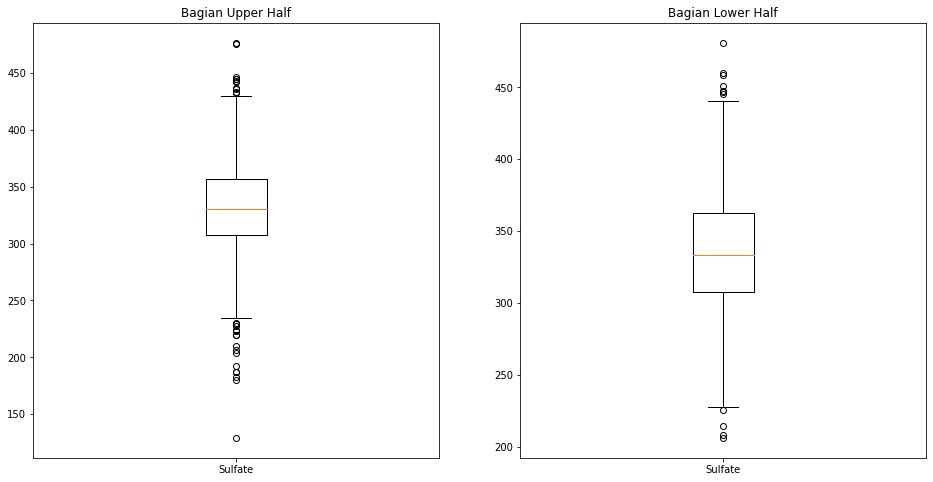

In [21]:
# Gambar Boxplot Data
fig, (ax_upper, ax_lower) = plt.subplots(1, 2, figsize=(16, 8))
ax_upper.set_title("Bagian Upper Half")
ax_lower.set_title("Bagian Lower Half")
_ = ax_upper.boxplot(p5_df_upper, labels=['Sulfate'])
_ = ax_lower.boxplot(p5_df_lower, labels=['Sulfate'])

#### Penentuan Hipotesis

Pada uji ini, `H0` adalah `var_1 == var_2` dan `H1` adalah `var_1 != var_2` *(Two-tailed test)*.

#### Nilai `alpha`

Nilai `alpha` yang digunakan adalah 0.05

#### Daerah Kritis

In [22]:
# z < -z_{alpha/2} || z > z_{alpha/2}
print(f"F < {f.ppf(p5_alpha / 2, p5_df_upper.count() - 1, p5_df_lower.count() - 1)} or F > {f.ppf(1 - p5_alpha/2, p5_df_upper.count() - 1, p5_df_lower.count() - 1)}")

F < 0.883572344355818 or F > 1.1317692392568777


#### Tes Statistik

Pengujian menggunakan test statistik untuk menentukan bahwa variansi kedua data bernilai sama.

In [23]:
f.ppf(0.05, 11, 9)

0.3452773085573657

In [24]:
p5_var_1 = p5_df_upper.var()
p5_var_2 = p5_df_lower.var()
p5_n_1 = p5_df_upper.count()
p5_n_2 = p5_df_upper.count()

p5_details = [
    f"var_1 = {p5_var_1}",
    f"var_2 = {p5_var_2}",
    f"n_1   = {p5_n_1}",
    f"n_2   = {p5_n_2}",
]

print("Detail Data")
for p5_s in p5_details:
    print(p5_s)
    
print("Uji Statistik")
p5_f = p5_var_1 / p5_var_2
print(f"F = {p5_f}")

Detail Data
var_1 = 1708.3966020772502
var_2 = 1682.7330644425087
n_1   = 1005
n_2   = 1005
Uji Statistik
F = 1.0152511043950063


#### Kesimpulan

Karena `-F_{alpha/2, dk1, dk2} < F < F_{alpha / 2, dk1, dk2}`, maka Hipotesis `H0` "Variansi data bagian atas dan bawah dari kolom Sulfate sama" diterima.